# Introduction to Machine Learning - Fall 2022

---

## Computer Assignment 1 <br>
Instructor: Sajjad Amini <br>
Assistant: Kiarash Vaziri <br>

---



# *💰 Bitcoin Market Summary*

In [ ]:
# PACKAGES
import math
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size':18})

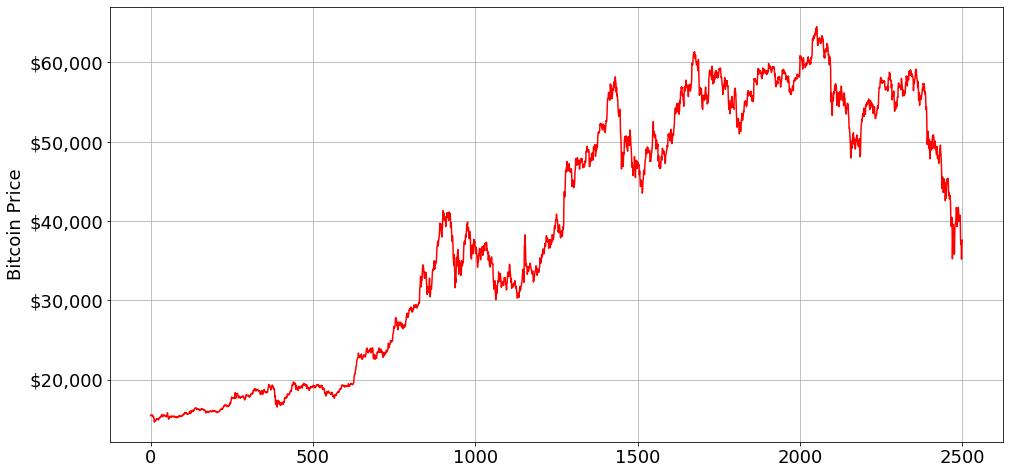

In [ ]:
# Plot market summary of bitcoin
btc_price = np.load("btc_price.npy")
plt.plot(btc_price, color='red', lw=1.5)
plt.ylabel('Bitcoin Price')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])
plt.grid()
plt.show()

In [ ]:
def plot(estimated,original,landa) :
        plt.plot(estimated, color='blue',label = "estimated price")
        plt.plot(original, color='red',label = "original price")
        plt.ylabel('Bitcoin Price')
        current_values = plt.gca().get_yticks()
        plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])
        plt.legend()
        plt.title(f"lambda={landa}")
        plt.grid()
        plt.show()

In [ ]:
def solve(n,lambda_par): 

    #------------------
    D= np.identity(n)
    D[n-1,n-1]=0           #deine D matrix
    x,y=np.where(D==1)
    D[x,y+1]=-1
    #------------------
    I=np.identity(n)      
    #-----------------
    coe_matrix=np.concatenate((I,np.sqrt(lambda_par)*D), axis=0)  #concatinate two natrixes verticaly


    y=np.ravel(btc_price)
    zeros=np.ravel(np.zeros(n))                 #define b matrix
    B=np.concatenate((y,zeros), axis=0)


    solution=np.linalg.lstsq(coe_matrix, B, rcond='warn')
    x=np.array(solution[0])

    return x
    

**plot estimations for different $\lambda$**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


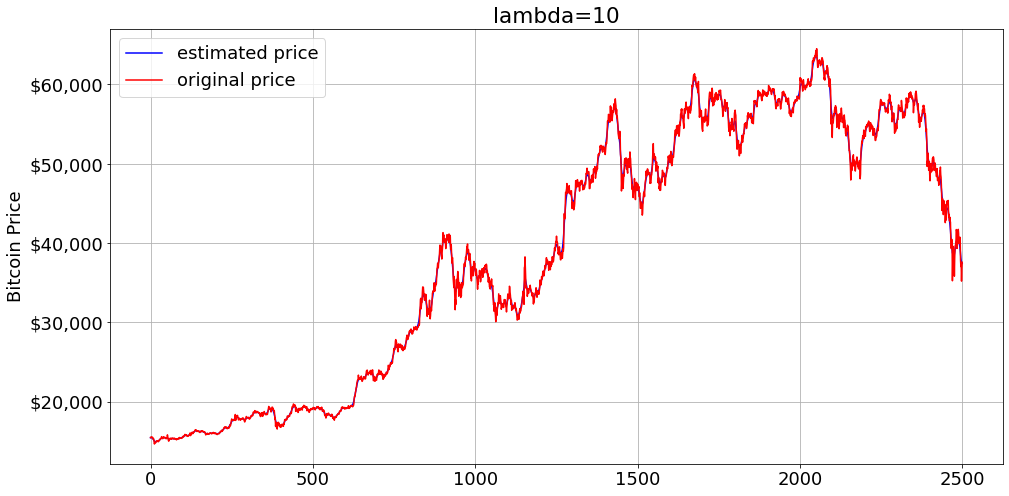

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


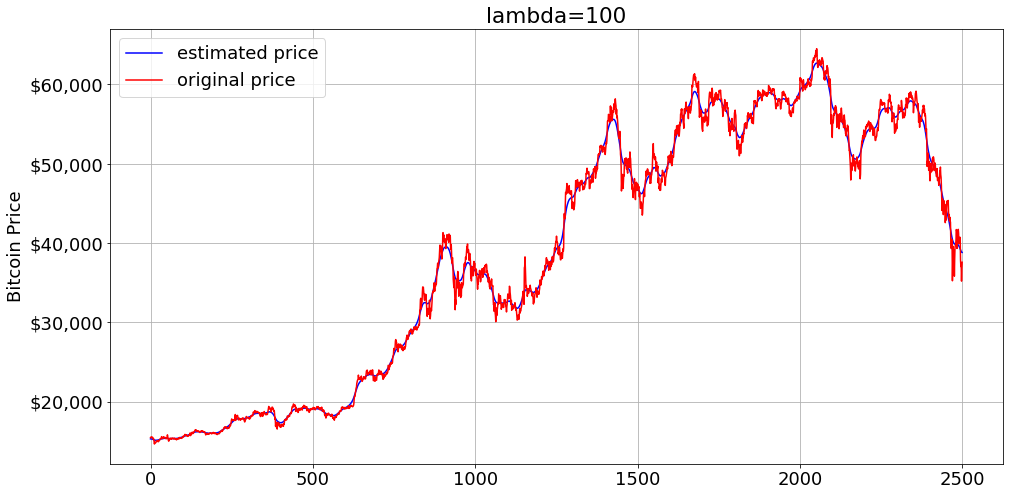

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


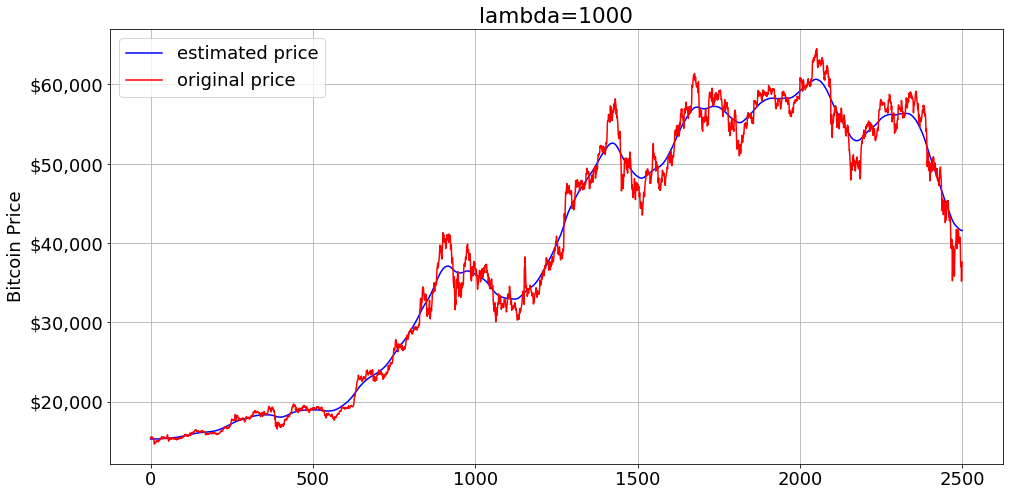

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


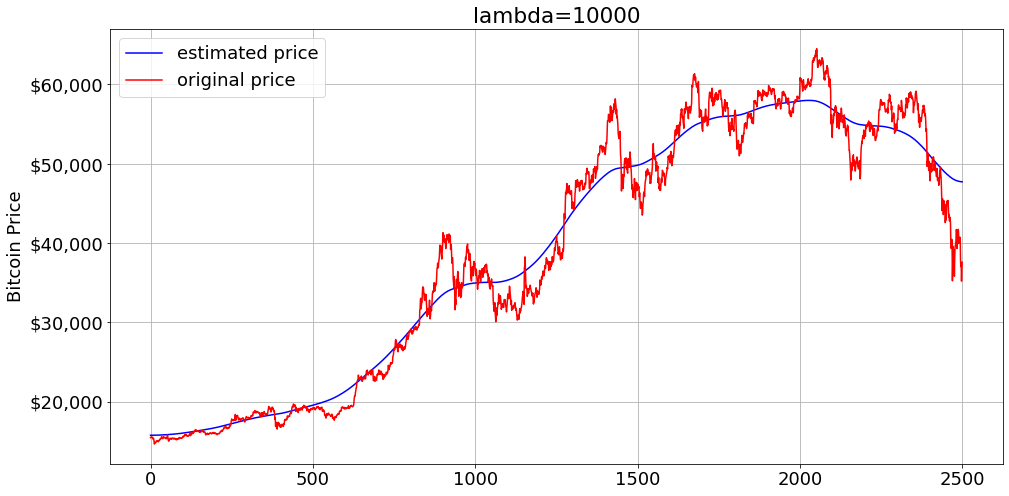

In [ ]:
#size of btc_price:               
n=len(btc_price)

lambda_list=[10,100,1000,10000]
for i in lambda_list : 
    x=solve(n,lambda_par=i)
    plot(x,btc_price,i)


A) How does the parameter $\lambda$ change the plots?<br>
B) For which value of $\lambda$ the data looks more realistic (denoised)?

---
Answer:

A : as $\lambda$ goes up, the smoothness of estimated function goes up as well . in fact, lanbda forces data points to be more close to each other and avoid jumps between prices 

B :it is a trade off between snoothness and being realastic. For smaller values of $\lambda$, the estimated function looks more realistic and more familiar to original noissy functionand for bigger  $\lambda$ it becomes smoother . overall i think $\lambda=100$ is a good choise for estimation. 

# *🛥️ Hutchinson*


In [ ]:
!pip install tqdm
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**import required libraries**

In [ ]:
# PACKAGES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm 

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size':18})

In [ ]:
def hutchinson1(A, m):
    """
      Hutchinson's estimator.
      Args:
          A: target symmetric matrix, size n x n
          m: # standard normal random vectors 
      Returns: estimated trace
    """
    # Write your code here
    n=len(A) #size of matrix 
    sum=0
    for i in range(0,m):
        v=0 + 1 * np.random.randn(n)
        sum+=v@A@np.transpose(v)
    tr=sum/m    
    return tr

def hutchinson2(A, m):
    """
    Hutchinson's estimator.
    Args:
        A: target symmetric matrix, size n x n
        m: # random sign vectors 
    Returns: estimated trace
    """
    # Write your code here
    n=len(A) #size of matrix 
    sum=0
    for i in range(0,m):
        v=np.random.randint(2, size=n)
        zero_indices=np.where(v==0)
        v[zero_indices]=-1
        sum+=v@A@np.transpose(v)

    tr=sum/m    
    return tr
    


In [ ]:
def relative_error(true, est):
  return np.abs((est-true)/true)

In [ ]:
# Test and evalutate the estimators
# DO NOT CHANGE ANYTHING IN THIS CELL
num_test = 500
errors1 = []
errors2 = []

m = 10000

for i in tqdm(range(num_test), desc='Running tests'):
    n = np.random.randint(10, 15)
    A = np.random.randn(n,n)
    A = (A + A.transpose()) / 2
    tr_est1 = hutchinson1(A, m)
    tr_est2 = hutchinson2(A, m)
    tr_true = np.trace(A)
    errors1.append(relative_error(tr_true, tr_est1))
    errors2.append(relative_error(tr_true, tr_est2))

# Report the errors statistically
print(f"Random vectors: standard normal, m={m}:")
print(f"Relative error = {np.mean(errors1)} +- {np.std(errors1)}")

print(f"Random vectors: sign, m={m}:")
print(f"Relative error = {np.mean(errors2)} +- {np.std(errors2)}")

Running tests: 100%|██████████| 500/500 [03:47<00:00,  2.20it/s]

Random vectors: standard normal, m=10000:
Relative error = 0.22810183507043819 +- 1.1254374197281247
Random vectors: sign, m=10000:
Relative error = 0.15671783364666714 +- 0.8094281297815047


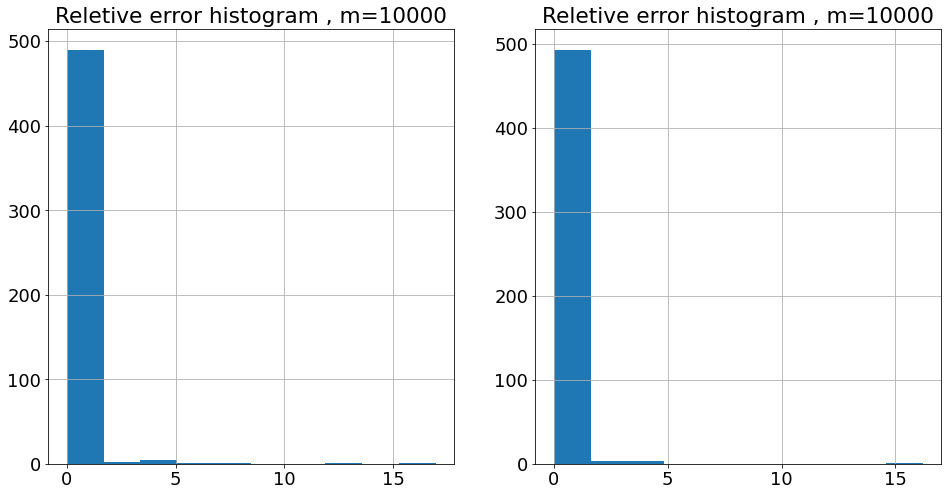

In [ ]:
# Part b : Plot the histograms
# You can use pandas and/or seaborn libraries
# Write your code here

fig, axs = plt.subplots(1,2)
axs[0].hist(errors1)
axs[0].set_title(f'Reletive error histogram , m=10000')
axs[0].grid()

axs[1].hist(errors2)
axs[1].set_title(f'Reletive error histogram , m=10000')
axs[1].grid()

(0.0, 0.3)

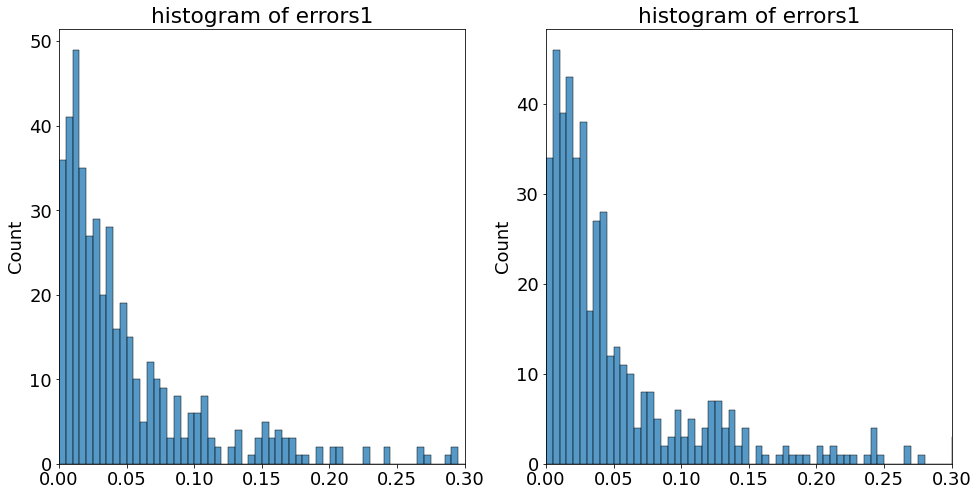

In [ ]:
# Part c : Plot the histograms 
# You can use pandas and/or seaborn libraries
# Write your code here

threshold=0.4
errors=np.array(errors1)
inlier_part1=[i for i in errors1 if i<threshold]
inlier_part2=[i for i in errors2 if i<threshold]

plt.subplot(1,2,1)
sns.histplot(data=inlier_part1,binwidth=0.005)
plt.title("histogram of errors1")
plt.xlim(0, 0.3)

plt.subplot(1,2,2)
sns.histplot(data=inlier_part2,binwidth=0.005)
plt.title("histogram of errors1")
plt.xlim(0, 0.3)
